In [1]:
import pandas as pd
import numpy as np

# Loading the data

## Loading trips.txt

Dataset at the center of the diagram linking the routes, the stop times, the shapes and the calendar.

In [2]:
trips_data = pd.read_csv('../data/gtfs23Sept/trips.txt', sep=",")
trips_data.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,14,237259001,113275577237259001,JULES BORDET,0,8934823,069b0002
1,14,237259001,113275578237259001,JULES BORDET,0,8934827,069b0002
2,14,237259001,113275579237259001,JULES BORDET,0,8934823,069b0002
3,14,237259001,113275580237259001,BORDET STATION,0,8934822,069b0005
4,14,237259001,113275581237259001,JULES BORDET,0,8934826,069b0002


## Loading routes.txt

Dataset containing transportation classes (tram, bus, metro) in order to select only trams.

In [3]:
routes_data = pd.read_csv('../data/gtfs23Sept/routes.txt', sep=",")

print(routes_data['route_type'].unique())
# print(np.unique(routes_data['route_type']))

routes_data.head()

[1 0 3]


,route_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,1,GARE DE L'OUEST - STOCKEL,NaN,1,NaN,B5378C,FFFFFF
1,4,2,SIMONIS - ELISABETH,NaN,1,NaN,ED6C23,FFFFFF
2,5,3,ESPLANADE - CHURCHILL,NaN,0,NaN,B4BD10,000000
3,8,4,GARE DU NORD - STALLE (P),NaN,0,NaN,EA4F80,000000
4,2,5,ERASME - HERRMANN-DEBROUX,NaN,1,NaN,F6A90B,FFFFFF


We can observe that there are only 3 types (which matches our 3 tram, bus and metros types). Using the column `route_long_name`, we were able to verify that:

| `route_type` |  **Type** |
|--------------|:---------:|
| 0            |  **Tram** |
| 1            | **Metro** |
| 3            |  **Bus**  |

## Loading stop_times.txt

Dataset containing the exact times at which a vehicle arrives at/departs from a stop, for every vehicle for every line.

Given that we are trying to plot, for **every stop** of **both directions** of **every line**, the **arrival time** of a given transportation vehicle. We take the arrival time (different from the departure time) because it's the time that matters to passengers.

In [4]:
stop_times_data = pd.read_csv('../data/gtfs23Sept/stop_times.txt', sep=",")
stop_times_data.head()

# print(stop_times_data['route_type'].unique())

/tmp/ipykernel_5337/3948994420.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times_data = pd.read_csv('../data/gtfs23Sept/stop_times.txt', sep=",")


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,113275577237259001,08:52:00,08:52:00,3107,1,0,0
1,113275577237259001,08:53:00,08:53:00,3177,2,0,0
2,113275577237259001,08:54:03,08:54:03,3171,3,0,0
3,113275577237259001,08:55:30,08:55:30,3172,4,0,0
4,113275577237259001,08:56:18,08:56:18,3173,5,0,0


We will attempt to join the tables in order to filter out metros and buses, given that trams are the vehicle type that we are studying.

In [5]:
trips_routes_merge = pd.merge(trips_data, routes_data, on='route_id')
trips_routes_merge = trips_routes_merge[['trip_id', 'service_id', 'route_type', 'route_short_name', 'trip_headsign', 'direction_id']]
trips_routes_merge = trips_routes_merge.loc[trips_routes_merge['route_type'] == 0]
trips_routes_merge.head()
# trips_routes_merge.tail()

,trip_id,service_id,route_type,route_short_name,trip_headsign,direction_id
48056,113566853238562002,238562002,0,3,CHURCHILL,0
48057,113566856238562002,238562002,0,3,CHURCHILL,0
48058,113566857238562002,238562002,0,3,ESPLANADE,1
48059,113566858238562002,238562002,0,3,ESPLANADE,1
48060,113566859238562002,238562002,0,3,ESPLANADE,1


We have successfully linked (tram) routes to all other possible datasets.

### TODO: verify hypothesis that monday = weekday (that 1 1 1 1 1 = 1)

In [6]:
calendar_data = pd.read_csv('../data/gtfs23Sept/calendar.txt', sep=",")
trips_routes_calendar = pd.merge(trips_routes_merge, calendar_data, on='service_id')
trips_routes_calendar.drop(['start_date', 'end_date', 'tuesday', 'wednesday', 'thursday', 'friday', 'service_id'], inplace=True, axis=1)
trips_routes_calendar.rename(columns={'monday': 'weekday'}, inplace=True)  #TODO hypothesis: monday = weekday
trips_routes_calendar.tail()

,trip_id,route_type,route_short_name,trip_headsign,direction_id,weekday,saturday,sunday
22158,113127688236806601,0,93,STADE,1,0,0,1
22159,113127695236806601,0,93,STADE,1,0,0,1
22160,113127702236806601,0,93,STADE,1,0,0,1
22161,113127707236806601,0,93,STADE,1,0,0,1
22162,113127711236806601,0,93,STADE,1,0,0,1


Now that we have linked calendar and routes, we will now further link it to stop times.

In [7]:
trcst = pd.merge(trips_routes_calendar, stop_times_data, on='trip_id')
trcst.drop(['pickup_type', 'drop_off_type', 'stop_sequence', 'departure_time', 'trip_id'], inplace=True, axis=1)
trcst.head()

,route_type,route_short_name,trip_headsign,direction_id,weekday,saturday,sunday,arrival_time,stop_id
0,0,3,CHURCHILL,0,1,0,0,21:54:00,5701
1,0,3,CHURCHILL,0,1,0,0,21:56:00,5700G
2,0,3,CHURCHILL,0,1,0,0,21:57:29,5704F
3,0,3,CHURCHILL,0,1,0,0,21:58:31,5705
4,0,3,CHURCHILL,0,1,0,0,22:00:00,5706


Say we take Tram 3 direction CHURCHILL at stop 5701.

In [8]:
stop_id = '5705'
line = '3'
trcst2 = trcst.loc[(trcst['direction_id'] == 0) & (trcst['weekday'] == 1) & (trcst['stop_id'] == stop_id) & (trcst['route_short_name'] == line)]
trip_headsign = trcst2['trip_headsign'].iat[0]
trcst2 = trcst2['arrival_time']
# trcst2.head()
arrival_times = trcst2.tolist()
print(arrival_times)

['21:58:31', '21:46:31', '23:58:31', '23:13:31', '23:28:31', '22:58:31', '23:43:31', '09:18:31', '09:33:31', '10:40:31', '10:56:31', '14:19:31', '14:34:31', '09:48:31', '11:04:31', '11:34:31', '14:48:31', '15:18:31', '10:03:31', '10:18:31', '10:33:31', '12:49:31', '15:33:31', '09:40:31', '10:25:31', '13:19:31', '11:19:31', '12:34:31', '12:04:31', '13:04:31', '13:34:31', '13:49:31', '15:03:31', '10:49:31', '09:25:31', '09:55:31', '11:49:31', '12:19:31', '10:10:31', '14:04:31', '22:13:31', '22:28:31', '22:43:31', '07:00:31', '07:19:31', '07:39:31', '06:54:31', '08:04:31', '08:14:31', '08:24:31', '08:39:31', '08:49:31', '08:54:31', '07:34:31', '09:04:31', '09:10:31', '08:29:31', '07:54:31', '07:13:31', '07:06:31', '07:59:31', '08:59:31', '08:44:31', '07:24:31', '07:49:31', '07:29:31', '08:09:31', '08:19:31', '08:34:31', '07:44:31', '05:44:31', '05:20:31', '06:08:31', '06:18:31', '05:32:31', '06:27:31', '06:37:31', '06:46:31', '05:56:31', '20:58:31', '21:10:31', '21:22:31', '20:09:31', '20

In [9]:
def time_to_sec(time:str):
    time = time.split(":")
    hours, minutes, seconds = int(time[0]), int(time[1]), int(time[2])
    return hours*60*60+minutes*60+seconds

In [10]:
arrival_times_minutes = map(time_to_sec, arrival_times)
arrival_times_minutes = list(arrival_times_minutes)
arrival_times_minutes = sorted(arrival_times_minutes)
print(arrival_times_minutes)

[18271, 18271, 19231, 19231, 19951, 19951, 20671, 20671, 21391, 21391, 22111, 22111, 22711, 22711, 23251, 23251, 23851, 23851, 24391, 24391, 24871, 24871, 25231, 25231, 25591, 25591, 26011, 26011, 26371, 26371, 26671, 26671, 26971, 26971, 27271, 27271, 27571, 27571, 27871, 27871, 28171, 28171, 28471, 28471, 28771, 28771, 29071, 29071, 29371, 29371, 29671, 29671, 29971, 29971, 30271, 30271, 30571, 30571, 30871, 30871, 31171, 31171, 31471, 31471, 31771, 31771, 32071, 32071, 32371, 32371, 32671, 32671, 33031, 33031, 33511, 33511, 33931, 33931, 34411, 34411, 34831, 34831, 35311, 35311, 35731, 35731, 36211, 36211, 36631, 36631, 37111, 37111, 37531, 37531, 38011, 38011, 38431, 38431, 38971, 38971, 39391, 39391, 39871, 39871, 40291, 40291, 40771, 40771, 41191, 41191, 41671, 41671, 42091, 42091, 42571, 42571, 42991, 42991, 43471, 43471, 43891, 43891, 44371, 44371, 44791, 44791, 45271, 45271, 45691, 45691, 46171, 46171, 46591, 46591, 47071, 47071, 47491, 47491, 47971, 47971, 48391, 48391, 48871

In [11]:
x, y = [], []
for i in range(len(arrival_times_minutes)-1):
    if round((arrival_times_minutes[i+1]-arrival_times_minutes[i])/60, 2):
        y.append(round((arrival_times_minutes[i+1]-arrival_times_minutes[i])/60, 2))
        x.append(round(arrival_times_minutes[i]/3600, 2))

In [12]:
import matplotlib.pyplot as plt

**TODO** : Change the plot to a bar plot

In [13]:
y

[16.0,
 12.0,
 12.0,
 12.0,
 12.0,
 10.0,
 9.0,
 10.0,
 9.0,
 8.0,
 6.0,
 6.0,
 7.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 9.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 7.0,
 7.0,
 8.0,
 7.0,
 8.0,
 7.0,
 8.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 11.0,
 12.0,
 12.0,
 12.0,
 13.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0]

In [14]:
x

[5.08,
 5.34,
 5.54,
 5.74,
 5.94,
 6.14,
 6.31,
 6.46,
 6.63,
 6.78,
 6.91,
 7.01,
 7.11,
 7.23,
 7.33,
 7.41,
 7.49,
 7.58,
 7.66,
 7.74,
 7.83,
 7.91,
 7.99,
 8.08,
 8.16,
 8.24,
 8.33,
 8.41,
 8.49,
 8.58,
 8.66,
 8.74,
 8.83,
 8.91,
 8.99,
 9.08,
 9.18,
 9.31,
 9.43,
 9.56,
 9.68,
 9.81,
 9.93,
 10.06,
 10.18,
 10.31,
 10.43,
 10.56,
 10.68,
 10.83,
 10.94,
 11.08,
 11.19,
 11.33,
 11.44,
 11.58,
 11.69,
 11.83,
 11.94,
 12.08,
 12.19,
 12.33,
 12.44,
 12.58,
 12.69,
 12.83,
 12.94,
 13.08,
 13.19,
 13.33,
 13.44,
 13.58,
 13.69,
 13.83,
 13.94,
 14.08,
 14.19,
 14.33,
 14.44,
 14.58,
 14.69,
 14.81,
 14.93,
 15.06,
 15.18,
 15.31,
 15.43,
 15.56,
 15.64,
 15.73,
 15.81,
 15.89,
 15.98,
 16.06,
 16.14,
 16.23,
 16.31,
 16.39,
 16.48,
 16.56,
 16.64,
 16.73,
 16.81,
 16.89,
 16.98,
 17.06,
 17.14,
 17.23,
 17.31,
 17.39,
 17.48,
 17.56,
 17.64,
 17.73,
 17.81,
 17.89,
 17.98,
 18.06,
 18.14,
 18.23,
 18.31,
 18.41,
 18.51,
 18.61,
 18.74,
 18.88,
 19.01,
 19.14,
 19.29,
 19.43,
 19

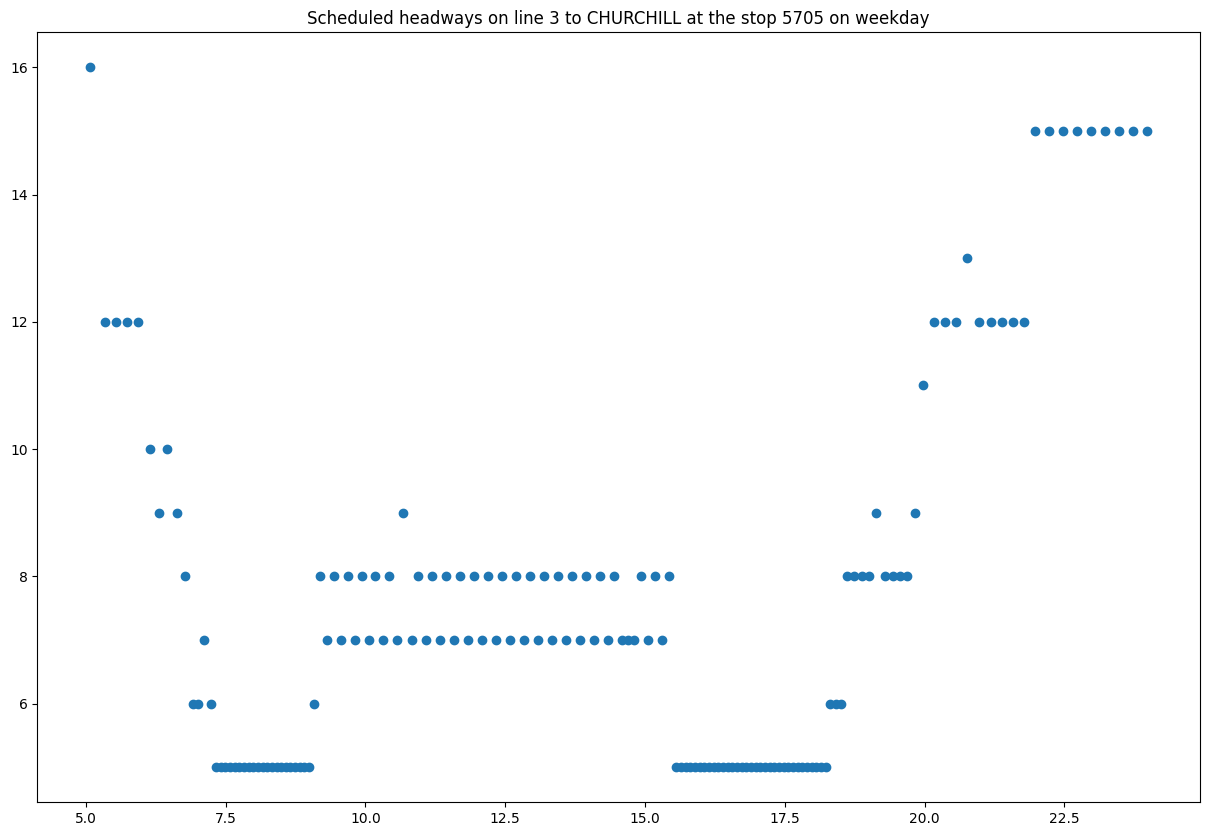

In [15]:
title = f"Scheduled headways on line {line} to {trip_headsign} at the stop {stop_id} on weekday"
plt.figure(figsize=[15,10])
plt.scatter(x, y)
plt.title(title)
plt.show()

In [33]:
z = list(zip(x,y))
z=np.array([list(x) for x in z])



In [90]:
from sklearn import cluster


#clustering = cluster.DBSCAN(eps=0.5, min_samples=20).fit(z)
#clustering = cluster.KMeans(n_clusters = 5, random_state=0).fit(z)
#clustering = cluster.Birch(n_clusters = None).fit(z)
#clustering = cluster.OPTICS(min_samples =20 ).fit(z)
#clustering = cluster.AffinityPropagation(random_state =0 ).fit(z)
clustering = cluster.MeanShift(bandwidth =3 ).fit(z)
#clustering = cluster.AgglomerativeClustering(5).fit(z)
labels = clustering.labels_
print(np.unique(labels))

[0 1 2 3 4 5]


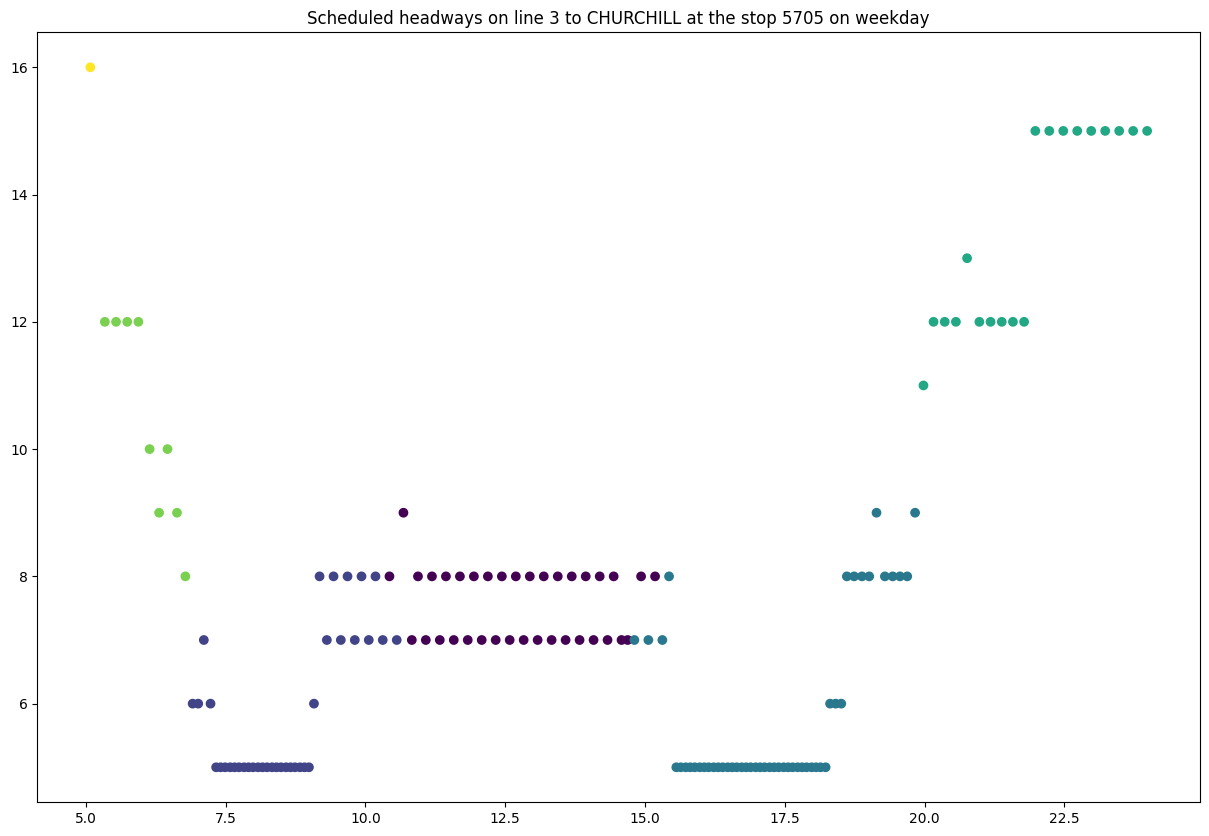

In [91]:
title = f"Scheduled headways on line {line} to {trip_headsign} at the stop {stop_id} on weekday"
plt.figure(figsize=[15,10])
plt.scatter(x, y, c=labels)
plt.title(title)
plt.show()